# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [9]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

df = pd.read_csv(bookReviewDataSet_filename)# YOUR CODE HERE

df.head(10)

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True
5,I don't know why it won the National Book Awar...,False
6,The daughter of a prominent Boston doctor is d...,False
7,I was very disapointed in the book.Basicly the...,False
8,I think in retrospect I wasted my time on this...,False
9,I have a hard time understanding what it is th...,False


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I have chosen the Book Review Dataset with information about individual demographics, education status, and capital gains. 
2. I will be predicting whether a particular book has a positive or negative review based on analyzing the words in the review. 
3. Supervised, cause we already know the outcomes of each review. Binary classification since labels are simply "true" or "false" with no grey area or more categorical variables. 
4. Features = Review. The label is "positive review" with an output value of either true or false. 
5. To understand the types of books that are more likely to generate positive reviews, tailor to their target demographics and audience, and invest in authors or publishers that are more likely to produce books with largely positive reviews. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
# Cleaning data: eliminating rows with NaN values. 
# Since there are only 2 columns, and 1 feature for determining the output, it is not necessary to keep rows with NaN in hopes that some other data in the row will be helpful. 
valuesrows_with_nan = df[df.isnull().any(axis=1)]
print(df.shape)
print(df['Positive Review'].value_counts())
print(valuesrows_with_nan)

# Creating new columns for engineered features
keywords = ['hard', 'expect', 'fan']
for word in keywords:
    df[f'contains_{word}'] = df['Review'].str.lower().str.contains(word)
    
df.head()

(1973, 2)
False    993
True     980
Name: Positive Review, dtype: int64
Empty DataFrame
Columns: [Review, Positive Review]
Index: []


,Review,Positive Review,contains_hard,contains_expect,contains_fan
0,This was perhaps the best of Johannes Steinhof...,True,False,False,False
1,This very fascinating book is a story written ...,True,True,False,False
2,The four tales in this collection are beautifu...,True,False,False,False
3,The book contained more profanity than I expec...,False,False,True,True
4,We have now entered a second time of deep conc...,True,False,False,False


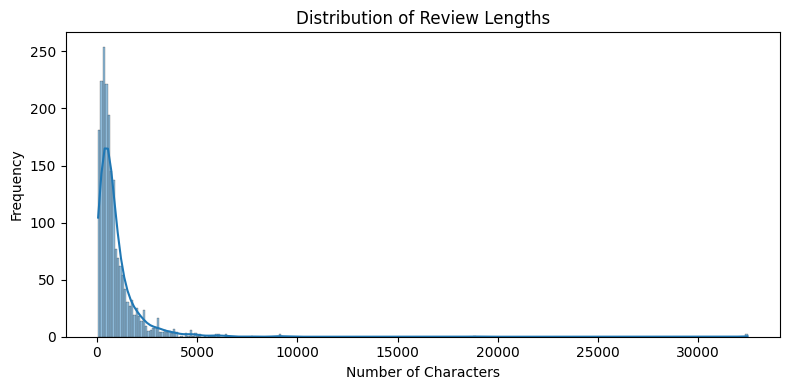

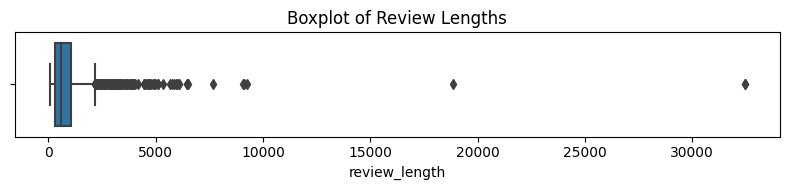

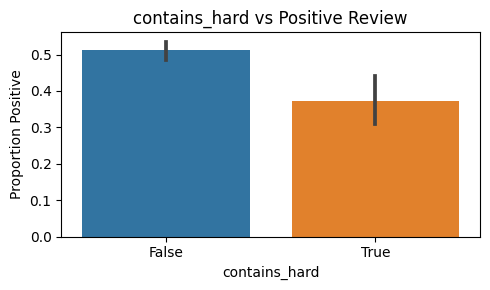

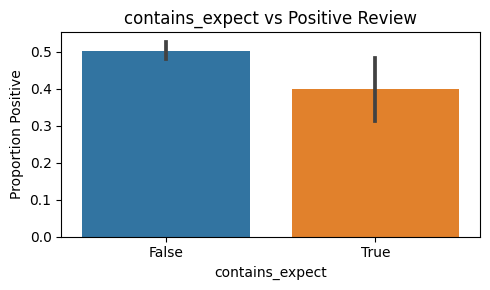

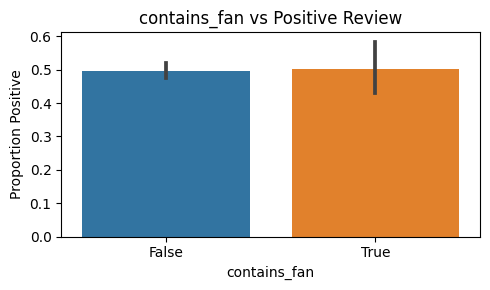

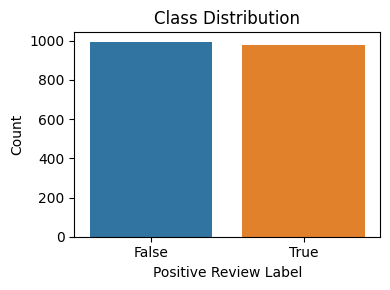

(1811, 6)


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure review column has no nulls before calculating length
df['review_length'] = df['Review'].fillna('').str.len()

# Histogram of review lengths, by character count
plt.figure(figsize=(8, 4))
sns.histplot(df['review_length'], kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Boxplot for outlier detection. Will calculate IQR later. 
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['review_length'])
plt.title('Boxplot of Review Lengths')
plt.tight_layout()
plt.show()

# Keyword features vs. label
keywords = ['hard', 'expect', 'fan']
for word in keywords:
    df[f'contains_{word}'] = df['Review'].str.lower().str.contains(word)
    
keyword_features = ['contains_hard', 'contains_expect', 'contains_fan']
for feature in keyword_features:
    plt.figure(figsize=(5, 3))
    sns.barplot(x=feature, y='Positive Review', data=df)
    plt.title(f'{feature} vs Positive Review')
    plt.ylabel('Proportion Positive')
    plt.tight_layout()
    plt.show()

# Classification distribution
plt.figure(figsize=(4, 3))
sns.countplot(x='Positive Review', data=df)
plt.title('Class Distribution')
plt.xlabel('Positive Review Label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Determining quartiles for interquartile range, outliers are greater or less than 1.5*IQR
Q1 = df['review_length'].quantile(0.25)
Q3 = df['review_length'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['review_length'] >= (Q1 - 1.5 * IQR)) & (df['review_length'] <= (Q3 + 1.5 * IQR))]
print(df.shape)

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. Our new feature list contains the Review itself that was provided in the dataset, but also our newly created columns contains_hard, contains_expect, and contains_fan. We did not remove any features after inspecting the data because we are already working with a dataset that has limited features, so any information will be helpful towards predicting a binary outcome. We chose to add the new columns to study whether some ambiguous words would be helpful towards predicting whether a review is positive or negative. Therefore, if an initial reviewer uses one of these words to describe the book during the publication process, the publisher and company is likely to know more about whether it has a positive or negative connotation and outlook. 

2. I checked the data for null rows and missing data — there were none. We also detected outliers in review length and removed them using the IQR method. We did not have to account for averages, since our target data is categorical and binary. We also checked the proportion of positive and negative responses in our target column, to find that it was relatively even and therefore will be less likely to cause overfitting in either direction.

3. I am implementing multiple binary classifiers such as Logistic Regression, Random Forest, and Naive Bayes. TF-IDF will be used for feature extraction and splitting the data into training and testing sets. The split ratio for training/testing will be 80/20. k-fold Cross validation will be used to reduce variance and hyperparameter tuning with grid search to improve model performance. Evaluation will include confusion matrices and classification reports to measure accuracy, precision, recall, and especially F1 score, which is a more reliable metric for assessing performance on binary classification tasks, even with slight class imbalance.

4. We are using natural language processing features, and trying to capture the context and general purpose of more ambiguous words that are used to define a book such as "hard," "expect," or "fan." 

5. We will use TF-IDF vectorization to transform review text into numerical features. We are not using neural networks in this project, as our models are designed for interpretability and the dataset size is more appropriate for traditional supervised classifiers.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [19]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [20]:
# YOUR CODE HERE
# cleaning and preparation
df = df.dropna(subset=['Review', 'Positive Review'])
X = df['Review']
y = df['Positive Review']

# Converts text review to TF IDF numerical vector format
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_vec = vectorizer.fit_transform(X)

# Split into training and testing sets. 20% is a typical proportion based on our psat projects.
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)
display(X_train)

<1448x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 35796 stored elements in Compressed Sparse Row format>

In [21]:
# Training and fitting a logistic regression model
# LR is the most suitable at this stage, since it outputs binary format. Easy to interpret feature importance. 
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# Testing the accuracy of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7768595041322314
[[141  45]
 [ 36 141]]
              precision    recall  f1-score   support

       False       0.80      0.76      0.78       186
        True       0.76      0.80      0.78       177

    accuracy                           0.78       363
   macro avg       0.78      0.78      0.78       363
weighted avg       0.78      0.78      0.78       363



The most accurate model cannot be determined among these three types, since they all have strengths and weaknesses in detecting positive outcomes. However, the most reliable for evenness is the F1-score, while the most reliable metric overall depends on the scenario. In contexts where true positives are more important—such as diagnostics or crisis detection—recall might be more useful. In contexts where true negatives are more important—such as spam email detection or the classification of images as innocent or guilty, with the grave consequences of a false conviction—precision may be more useful. In the context of a book review, I believe precision is more useful than recall because it is more important to investigate the reasons or sentiments underlying negative reviews and work to change the opinion of those readers in the future. However, it may be argued that F1-score is the optimal model in this context because it is equally important to identify the reasons and factors underlying positive and negative book reviews.

In [22]:
# Comparing 3 models using 5-cross fold validation
# 5 cross-fold validation splits the data into 5 equal parts, training = 4 folds, testing = 1 fold
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': MultinomialNB()
}

# Printing results of accuracy, to compare directly between logisitc Regression, Random Forest, and Naive Bayes models
for name, model in models.items():
    scores = cross_val_score(model, X_vec, y, cv=5, scoring='accuracy')
    print(f"{name}: Mean CV Accuracy = {scores.mean():.4f}")


Logistic Regression: Mean CV Accuracy = 0.7880
Random Forest: Mean CV Accuracy = 0.7946
Naive Bayes: Mean CV Accuracy = 0.7802


In [8]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_vec, y)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Params: {'C': 1}
Best Score: 0.7754623144637923
